In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
import numpy as np
from keras.models import load_model

In [2]:
test = "C:/Users/muham/OneDrive/Documents/Kuliah/Materi Kuliah/Skripsi/skripsi-gial/data/data/test"

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 214 images belonging to 2 classes.


In [5]:
class_name=['cataract', 'normal']

In [6]:
model1 = load_model('model/Model1.h5')
model2 = load_model('model/Model2.h5')
model3 = load_model('model/Model3.h5')

In [7]:
test_evaluate = model2.evaluate(test_generator)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}')

7/7 [==============================] - 6s 797ms/step - loss: 0.2653 - accuracy: 0.8972
Test loss     : 0.2653432786464691
Test accuracy : 0.9


In [8]:
y_test = test_generator.classes
y_pred = model2.predict(test_generator)

7/7 [==============================] - 5s 713ms/step


In [9]:
y_pred = (y_pred > 0.5).astype(int).ravel()

In [10]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [12]:
import os
import pandas as pd

label = []
prediction = []
paths = []

for kelas in os.listdir(os.path.join('C:/Users/muham/OneDrive/Documents/Kuliah/Materi Kuliah/Skripsi/skripsi-gial/data/data', 'test')):
    kelas_path = os.path.join('C:/Users/muham/OneDrive/Documents/Kuliah/Materi Kuliah/Skripsi/skripsi-gial/data/data', 'test', kelas)
    for path in os.listdir(kelas_path):
        paths.append(path)
        label.append(kelas)
for predict in y_pred:
    if predict == 0:
        label_pred = 'cataract'
    else:
        label_pred = 'normal'  
    prediction.append(label_pred)


df_test = pd.DataFrame({
    'fileName': paths,
    'y_test': label,
    'y_pred': prediction
})

In [13]:
df_test = df_test.sort_values(by=['fileName'])

In [14]:
df_test

,fileName,y_test,y_pred
0,104.jpg,cataract,cataract
107,104.jpg,normal,normal
108,106.jpg,normal,normal
1,106.jpg,cataract,cataract
2,11.jpg,cataract,cataract
...,...,...,...
211,image_87.png,normal,normal
105,image_88.png,cataract,cataract
212,image_89.png,normal,cataract
106,image_91 - Copy.png,cataract,normal


In [15]:
df_test.to_csv('test-model2.csv', index=False)

### Feature Extraction

In [18]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from io import StringIO
import numpy as np
from random import randint


In [23]:
SELECTED_DATA = os.path.join('C:/Users/muham/OneDrive/Documents/Kuliah/Materi Kuliah/Skripsi/skripsi-gial/data/data/train')

In [75]:
def show_image_and_feature_maps(image_path):
    loaded_image = load_img(image_path, target_size=(150,150))
    x = img_to_array(loaded_image)
    x = x/255.0
    x = np.expand_dims(x, axis=0)
    image = np.vstack([x])

    model2_fm = tf.keras.models.Model(inputs=model2.input, outputs=model2.get_layer('conv2d_8').output)
    feature_maps = model2_fm.predict(image)

    # show the images
    plt.imshow(loaded_image)

    # plot first 20 filters
    n_filters = 28
    # specify subplot and turn of axis
    fig, ax = plt.subplots(4, 7)

    # show the first 20 feature map
    for i in range(n_filters):
        # specify subplot and turn of axis
        ax[i//7, i%7].imshow(feature_maps[0, :, :, i], cmap='gray')
        ax[i//7, i%7].axis('off')

    return model2.predict(image)

In [76]:
def show_random_image(label, return_path=False):
    class_folder = os.path.join(SELECTED_DATA, label)
    list_files = os.listdir(class_folder)
    random_idx = randint(0, len(list_files))
    file_path = os.path.join(class_folder, list_files[random_idx])
    print(file_path)
    if return_path:
        return show_image_and_feature_maps(file_path), file_path
    return show_image_and_feature_maps(file_path)

C:/Users/muham/OneDrive/Documents/Kuliah/Materi Kuliah/Skripsi/skripsi-gial/data/data/train\normal\image_139.png
1/1 [==============================] - 0s 42ms/step


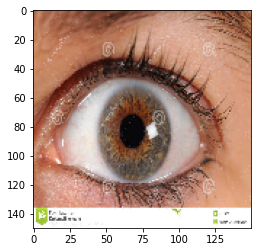

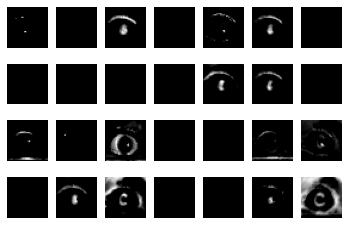

In [77]:
cataract_sample = show_random_image('normal')